<a href="https://colab.research.google.com/github/Harshnagwani123/Heart_Disease_Prediction/blob/main/Heart_Disease_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Basic Libraries
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# ML Models
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Evaluation
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [2]:
# Load dataset
df = pd.read_csv("/content/cleaned_merged_heart_dataset.csv")


print(df.head())
print(df.info())
print(df.describe())


   age  sex  cp  trestbps  chol  fbs  restecg  thalachh  exang  oldpeak  \
0   63    1   3       145   233    1        0       150      0      2.3   
1   37    1   2       130   250    0        1       187      0      3.5   
2   41    0   1       130   204    0        0       172      0      1.4   
3   56    1   1       120   236    0        1       178      0      0.8   
4   57    0   0       120   354    0        1       163      1      0.6   

   slope  ca  thal  target  
0      0   0     1       1  
1      0   0     2       1  
2      2   0     2       1  
3      2   0     2       1  
4      2   0     2       1  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1888 entries, 0 to 1887
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1888 non-null   int64  
 1   sex       1888 non-null   int64  
 2   cp        1888 non-null   int64  
 3   trestbps  1888 non-null   int64  
 4   chol      1888 non-null   int

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalachh    0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


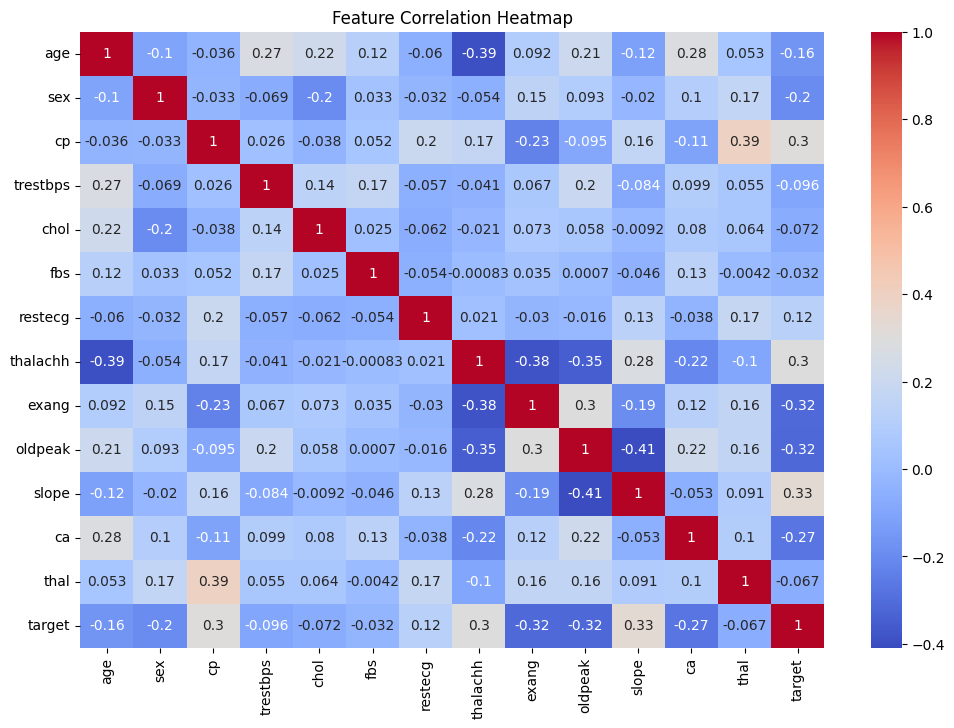

/tmp/ipython-input-3401745168.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="target", data=df, palette="Set2")


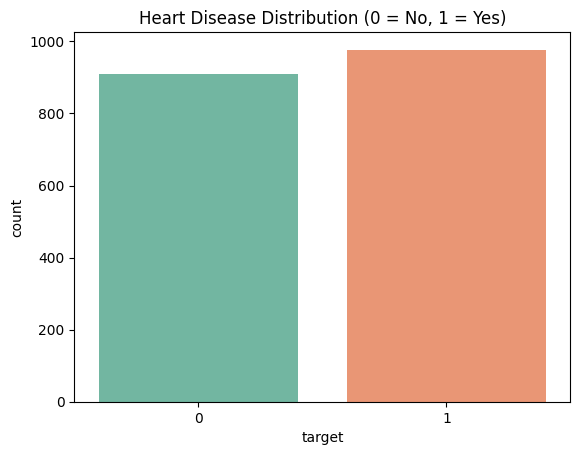

In [3]:
# Check missing values
print(df.isnull().sum())

# Correlation heatmap
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()

# Target distribution
sns.countplot(x="target", data=df, palette="Set2")
plt.title("Heart Disease Distribution (0 = No, 1 = Yes)")
plt.show()


In [4]:
X = df.drop("target", axis=1)
y = df["target"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [5]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [6]:
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(max_depth=5, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "SVM": SVC(kernel="rbf", random_state=42)
}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc
    print(f"\n{name} Accuracy: {acc:.4f}")
    print(classification_report(y_test, y_pred))



Logistic Regression Accuracy: 0.7460
              precision    recall  f1-score   support

           0       0.78      0.66      0.71       182
           1       0.72      0.83      0.77       196

    accuracy                           0.75       378
   macro avg       0.75      0.74      0.74       378
weighted avg       0.75      0.75      0.74       378


Decision Tree Accuracy: 0.8783
              precision    recall  f1-score   support

           0       0.89      0.85      0.87       182
           1       0.87      0.90      0.89       196

    accuracy                           0.88       378
   macro avg       0.88      0.88      0.88       378
weighted avg       0.88      0.88      0.88       378


Random Forest Accuracy: 0.9815
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       182
           1       0.97      0.99      0.98       196

    accuracy                           0.98       378
   macro avg       0.98   

/tmp/ipython-input-265440458.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(results.keys()), y=list(results.values()), palette="viridis")


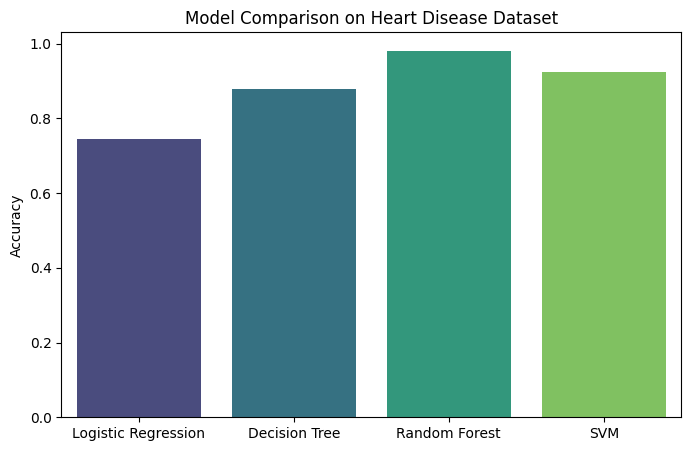

In [7]:
# Plot model comparison
plt.figure(figsize=(8,5))
sns.barplot(x=list(results.keys()), y=list(results.values()), palette="viridis")
plt.ylabel("Accuracy")
plt.title("Model Comparison on Heart Disease Dataset")
plt.show()


Best Model: Random Forest


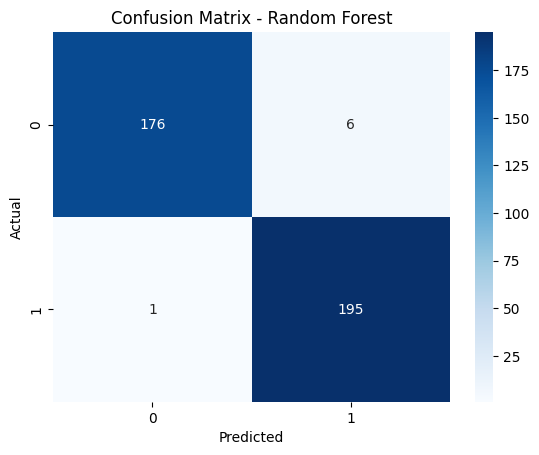

In [8]:
best_model = max(results, key=results.get)
print(f"Best Model: {best_model}")

final_model = models[best_model]
y_pred_final = final_model.predict(X_test)

cm = confusion_matrix(y_test, y_pred_final)

sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=[0,1], yticklabels=[0,1])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title(f"Confusion Matrix - {best_model}")
plt.show()
